In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

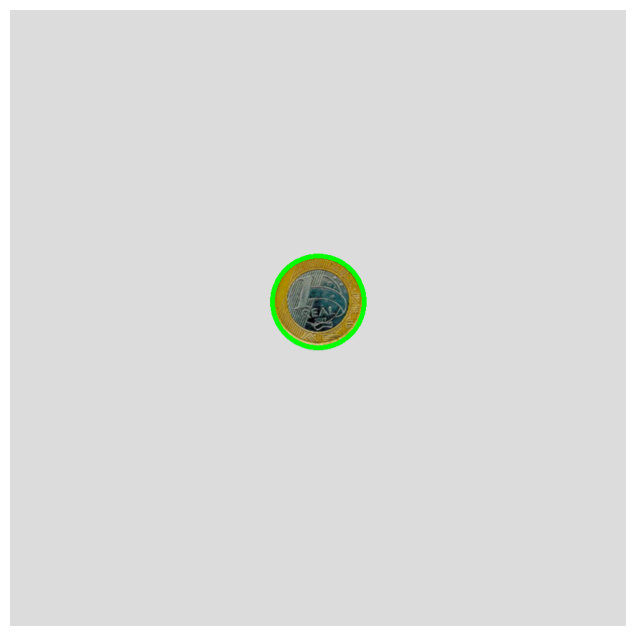

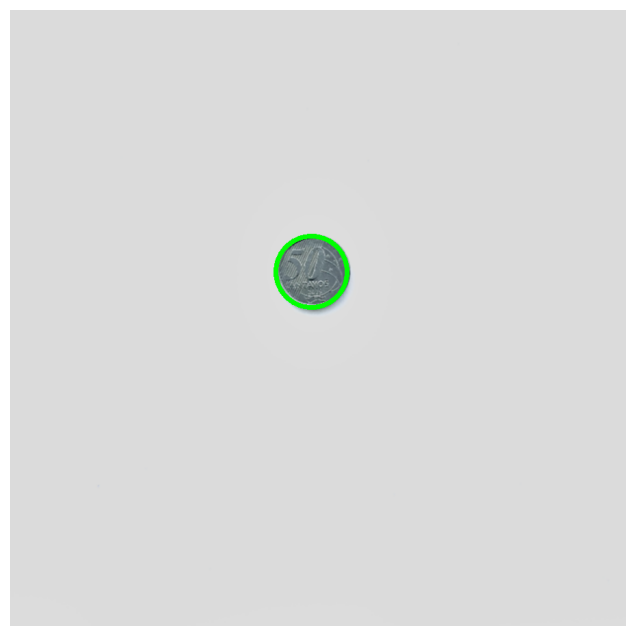

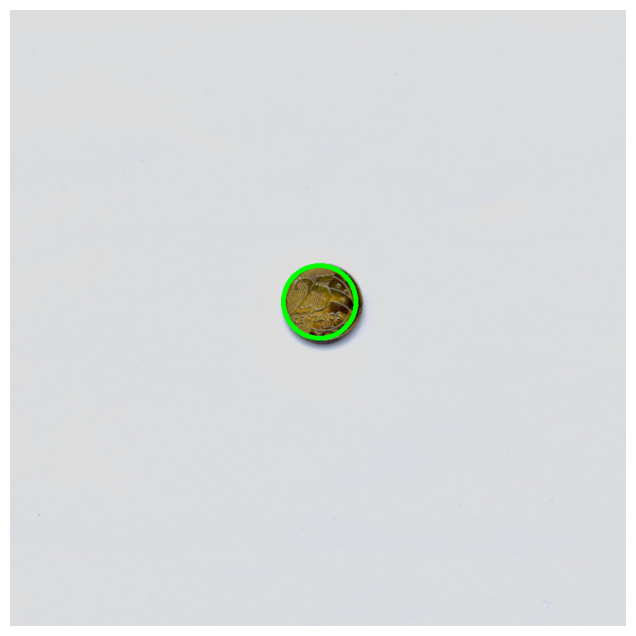

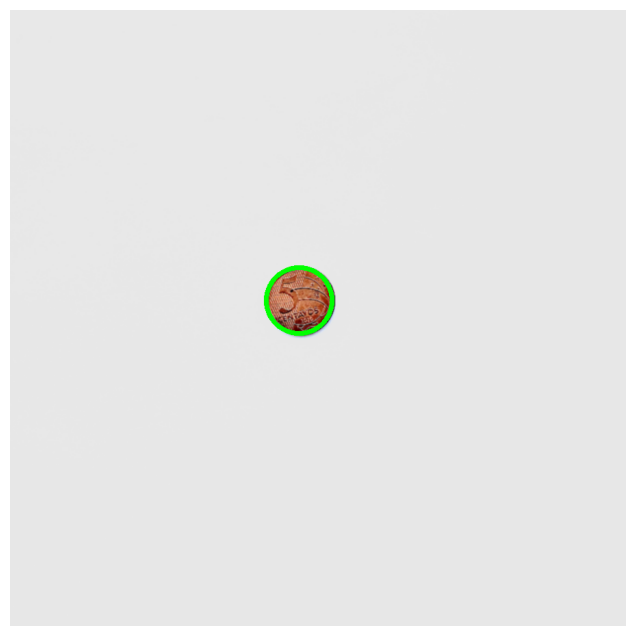

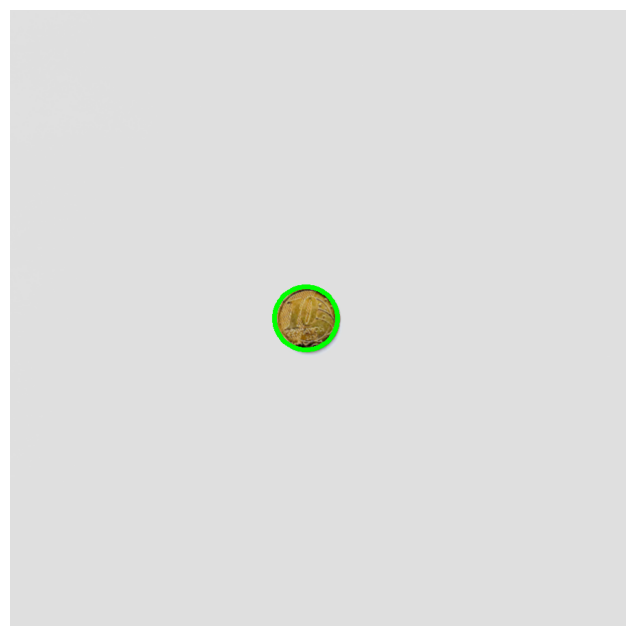

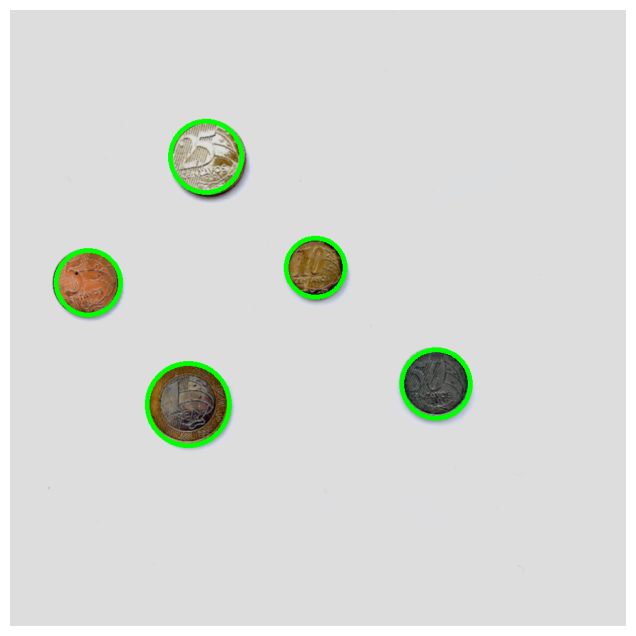

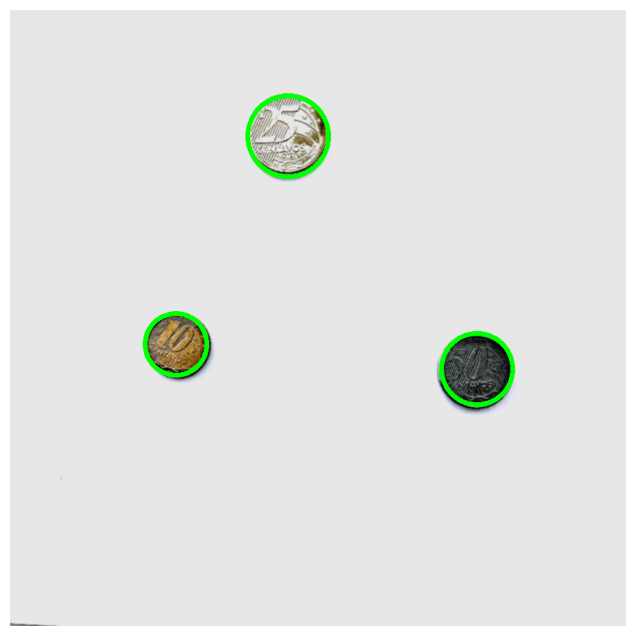

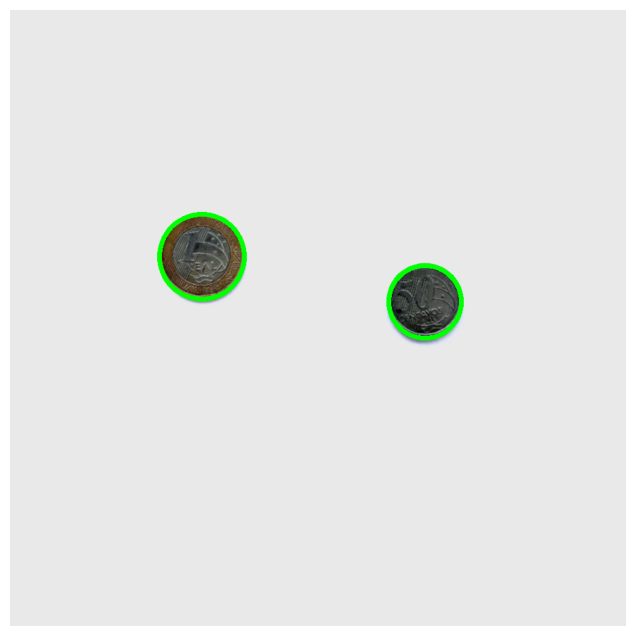

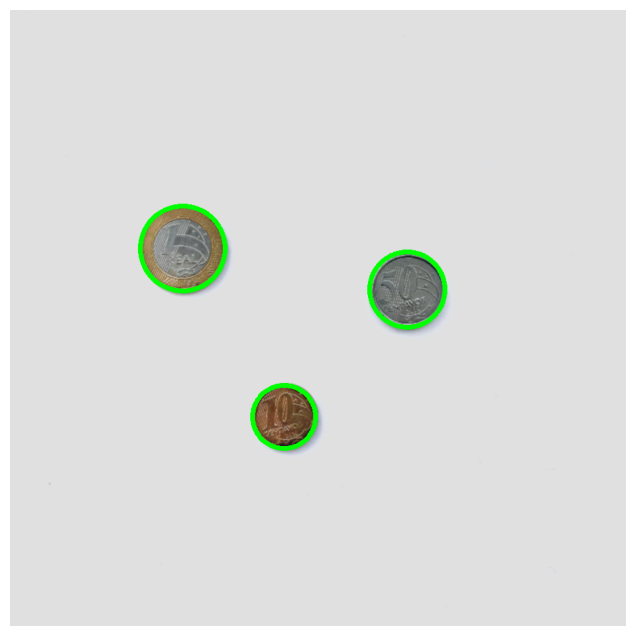

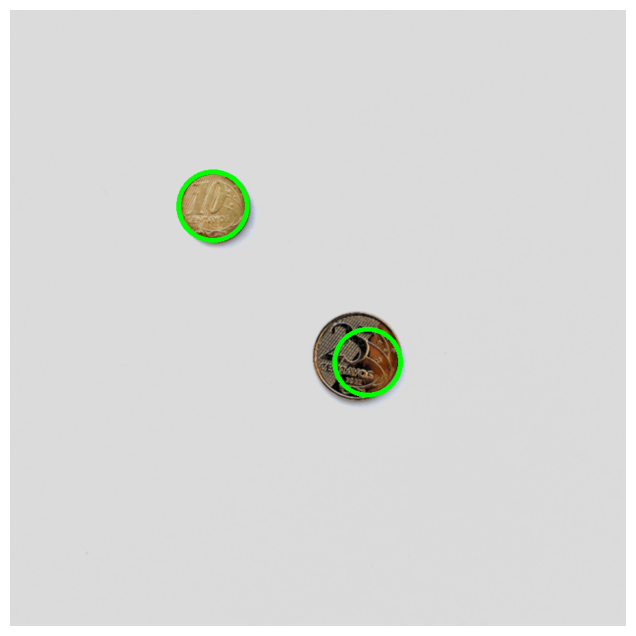

In [8]:
for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (900, 900))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=300, param2=60)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

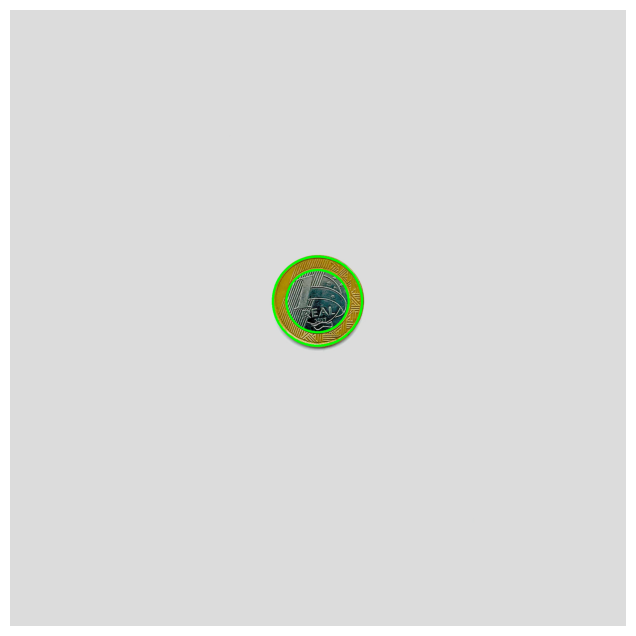

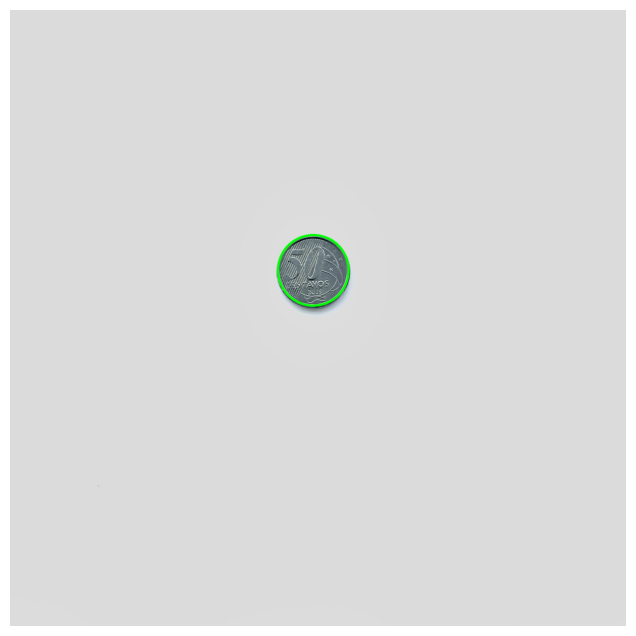

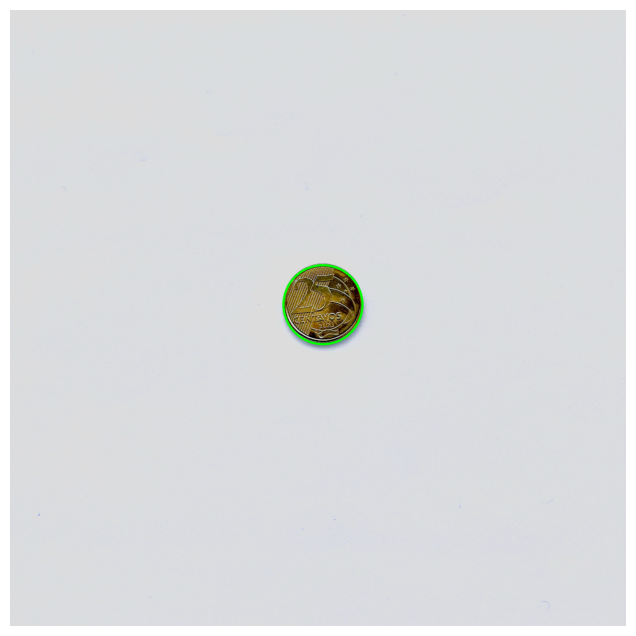

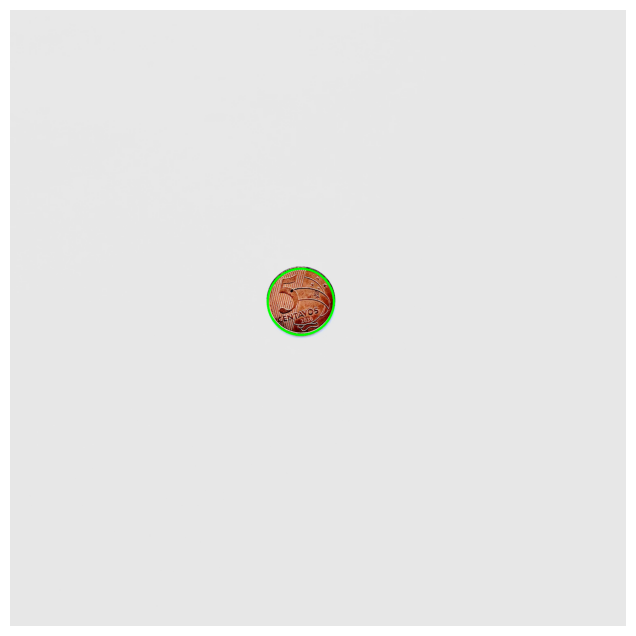

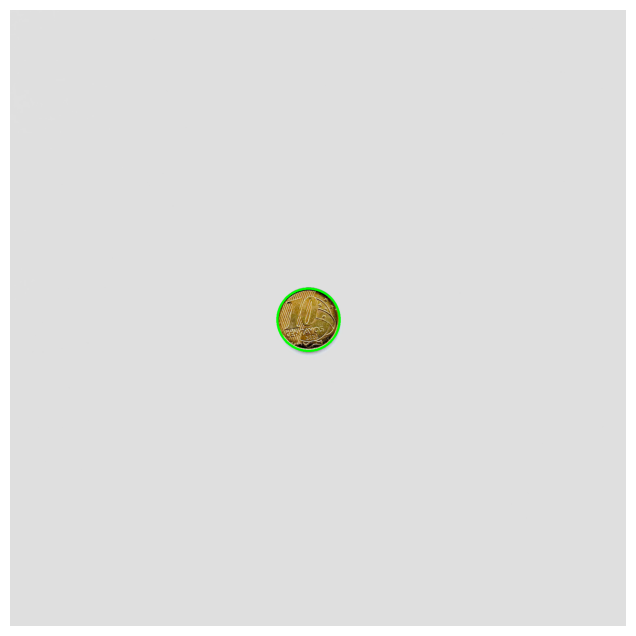

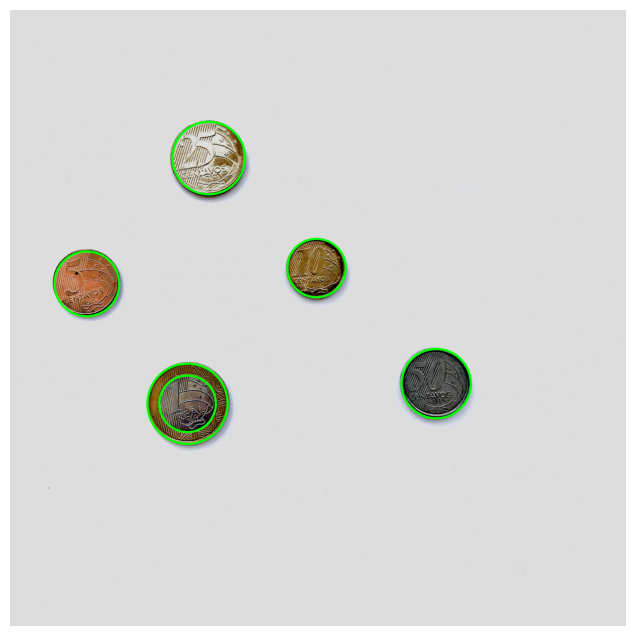

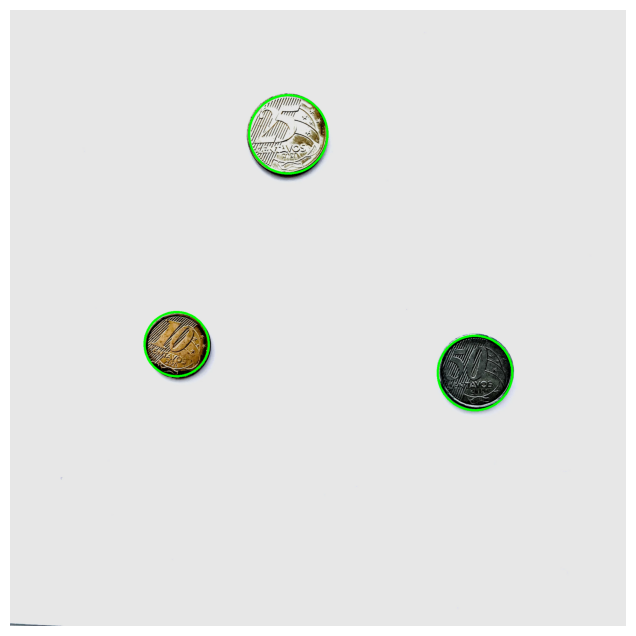

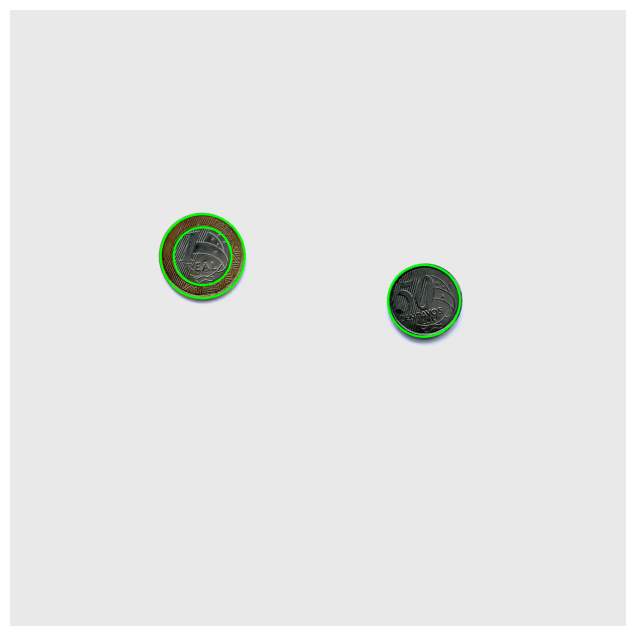

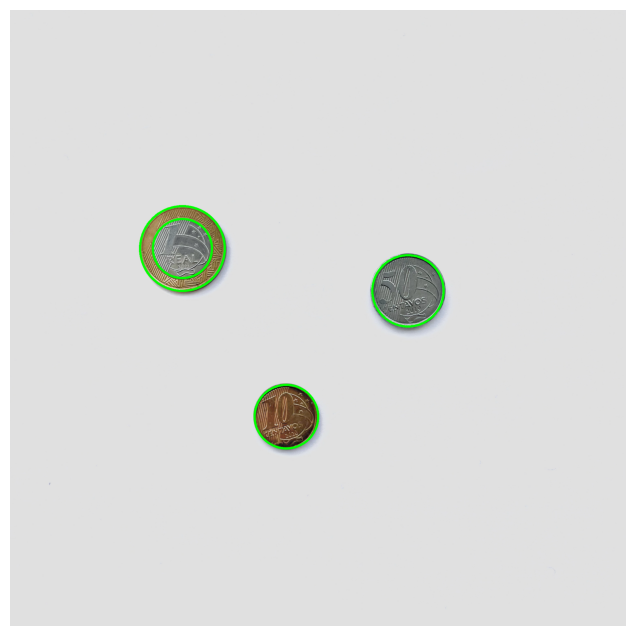

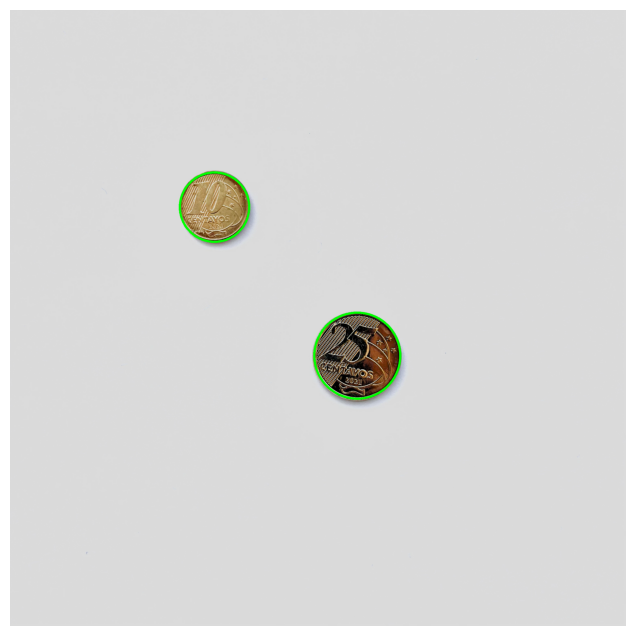

In [22]:
for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    #img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT_ALT, 1, 30, param1=300, param2=0.9)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

/var/folders/9k/jpltjdcs1tq5xwxpfp8f4qy80000gn/T/ipykernel_58401/1960787521.py:10: RuntimeWarning: overflow encountered in scalar subtract
  center_distance = np.sqrt((circle1[0] - circle2[0]) ** 2 + (circle1[1] - circle2[1]) ** 2)


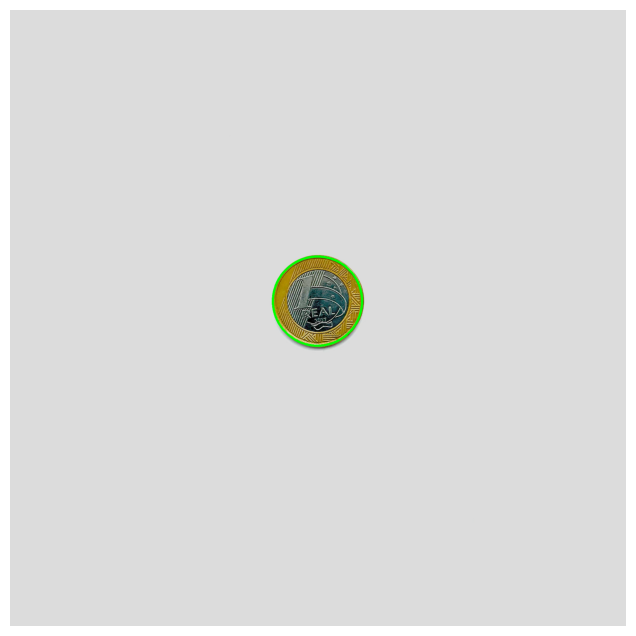

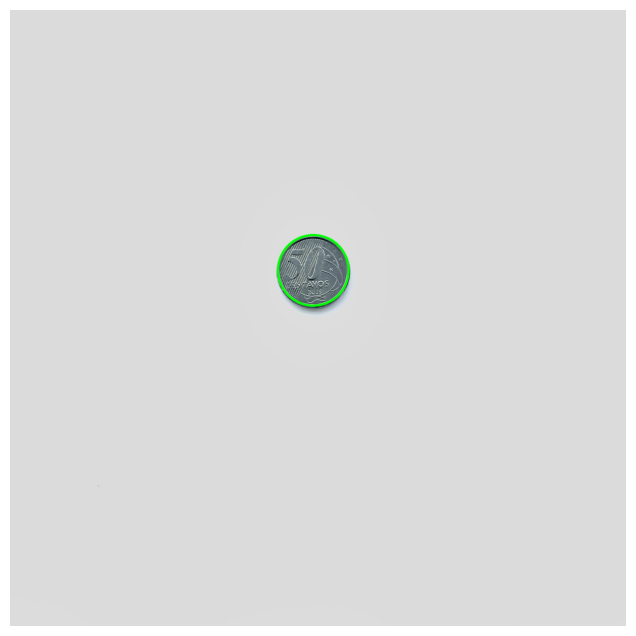

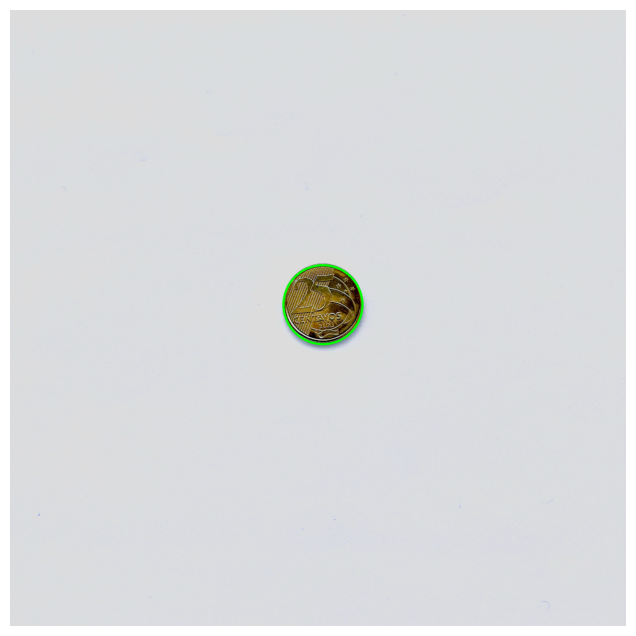

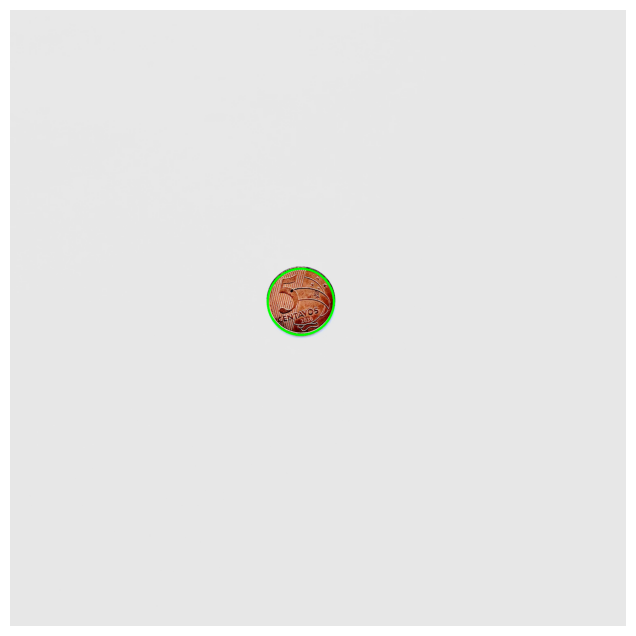

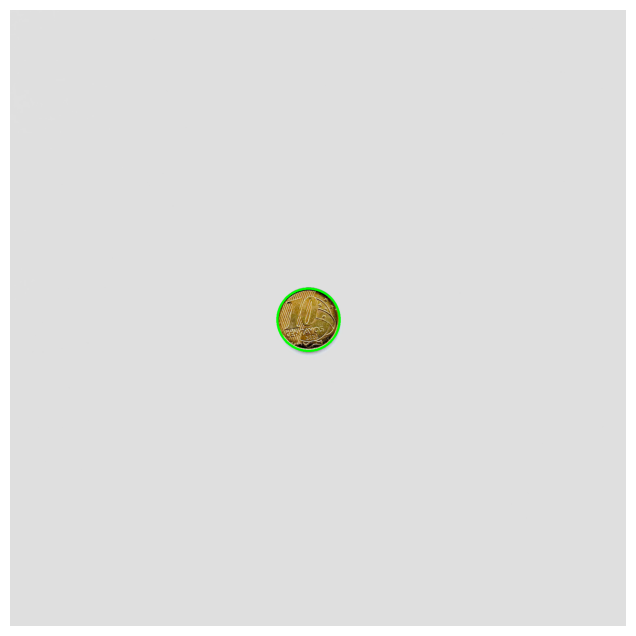

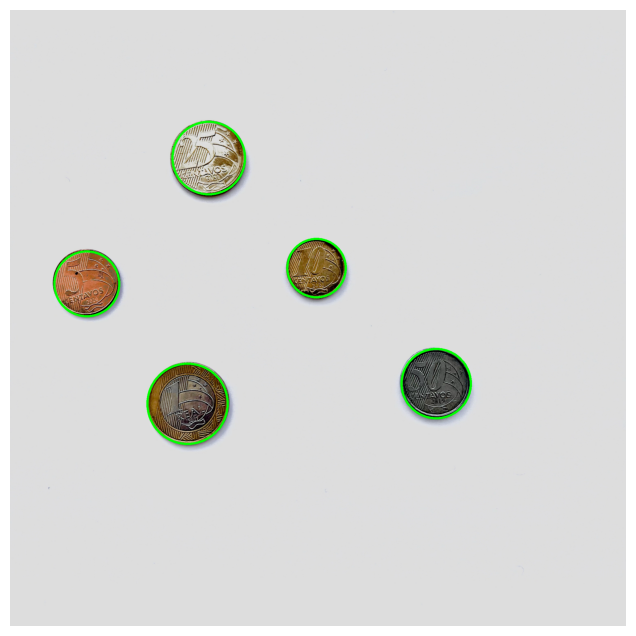

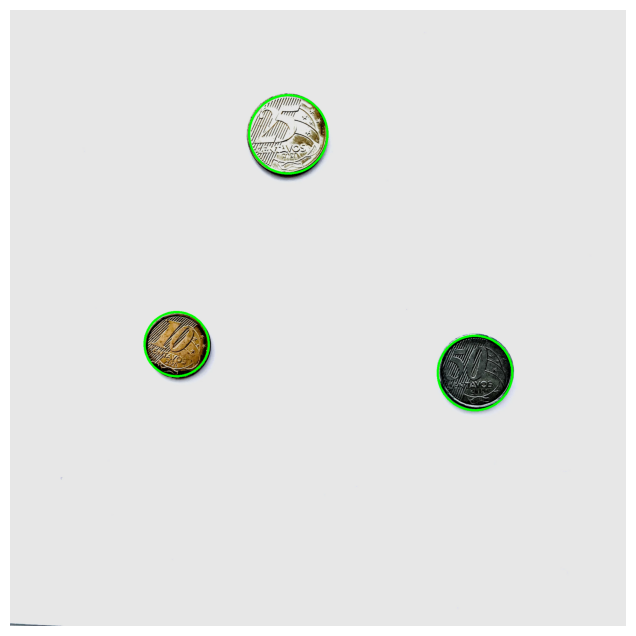

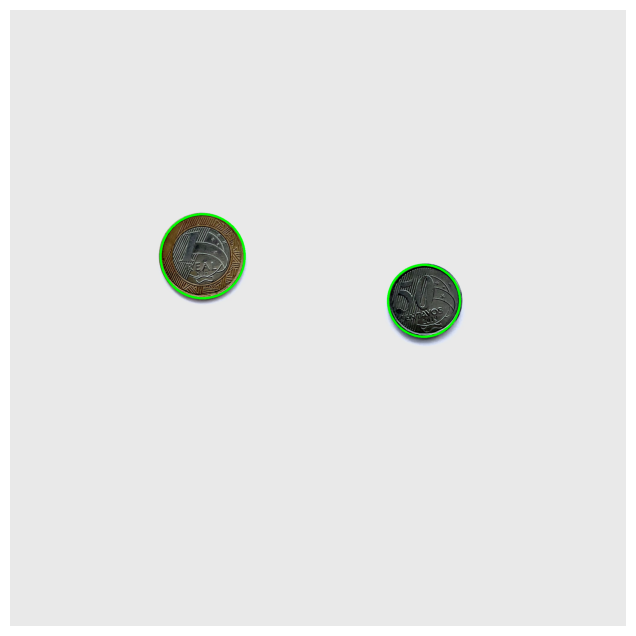

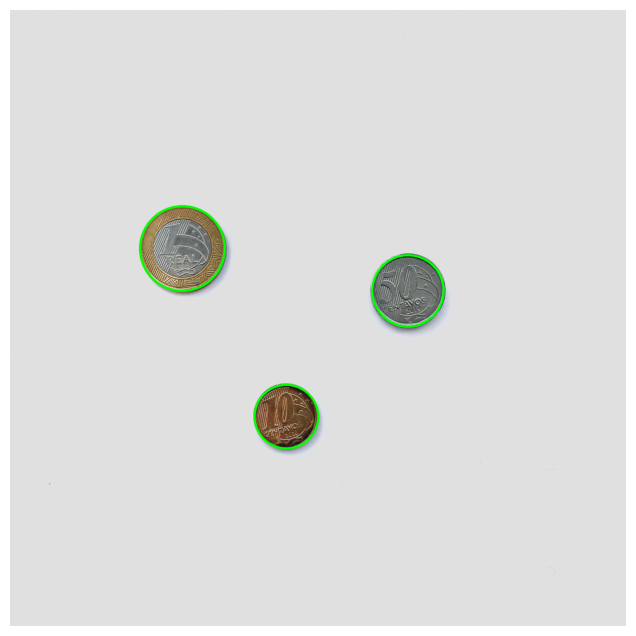

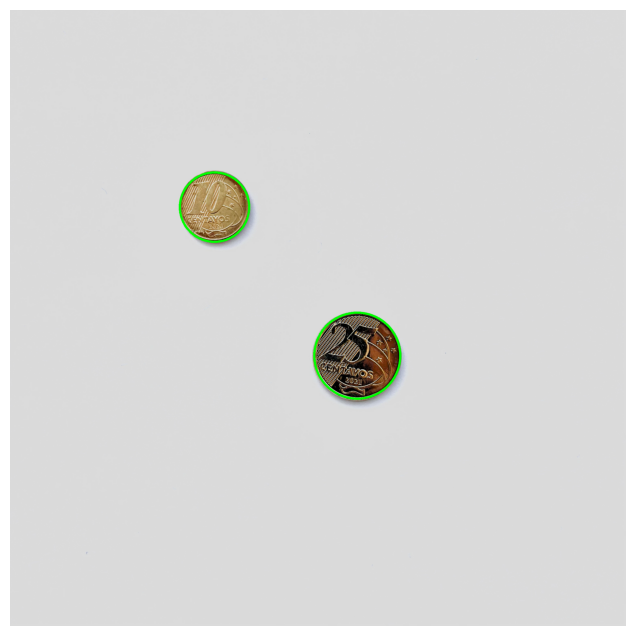

In [23]:
def filter_inner_circles(circles, max_center_distance):
    filtered_circles = []
    circle_flags = [True] * len(circles[0])

    for i, circle1 in enumerate(circles[0]):
        for j, circle2 in enumerate(circles[0]):
            if i == j or not circle_flags[i] or not circle_flags[j]:
                continue

            center_distance = np.sqrt((circle1[0] - circle2[0]) ** 2 + (circle1[1] - circle2[1]) ** 2)

            if center_distance <= max_center_distance:
                if circle1[2] > circle2[2]:
                    circle_flags[j] = False
                else:
                    circle_flags[i] = False

    for i, flag in enumerate(circle_flags):
        if flag:
            filtered_circles.append(circles[0, i])

    return np.array(filtered_circles)

for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    #img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT_ALT, 1, 30, param1=300, param2=0.9)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        max_center_distance = 10
        filtered_circles = filter_inner_circles(circles, max_center_distance)
        for circle in filtered_circles:
            img = cv2.circle(img, (circle[0], circle[1]), circle[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

510718.5
442521.0
380795.5
463521.5
477869.0
405422.0
444154.5
497495.5
496736.5
481008.5


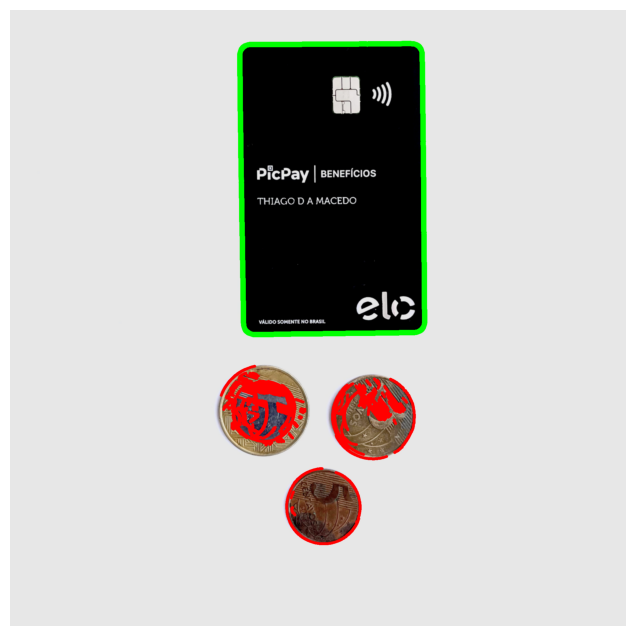

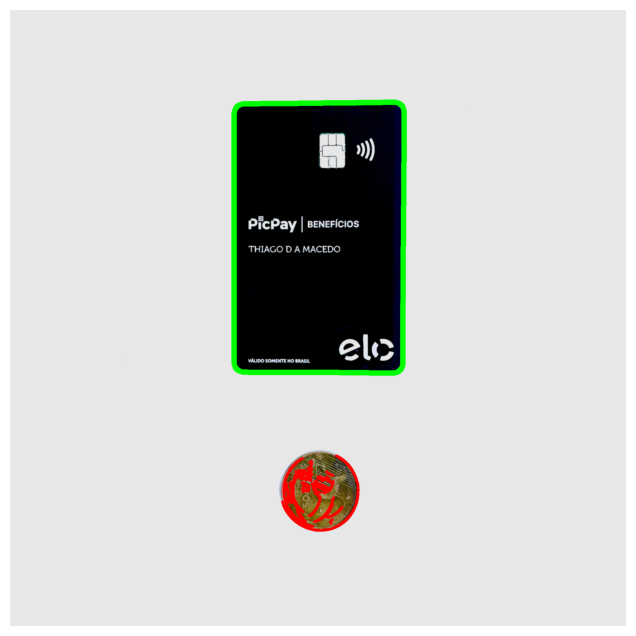

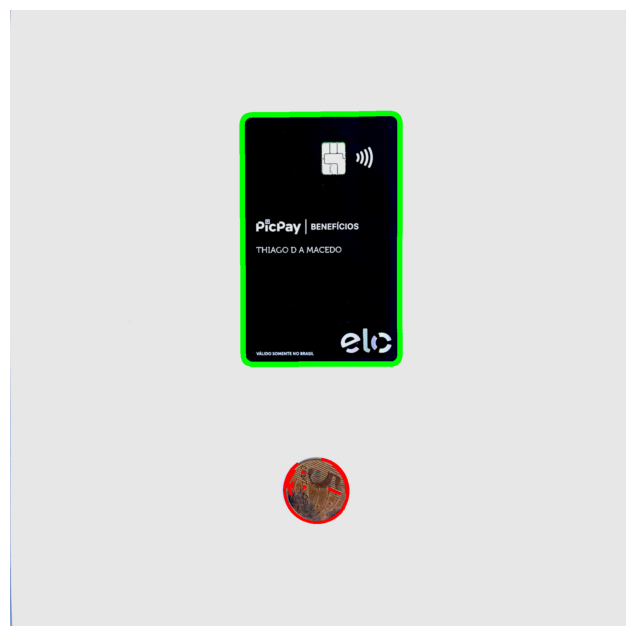

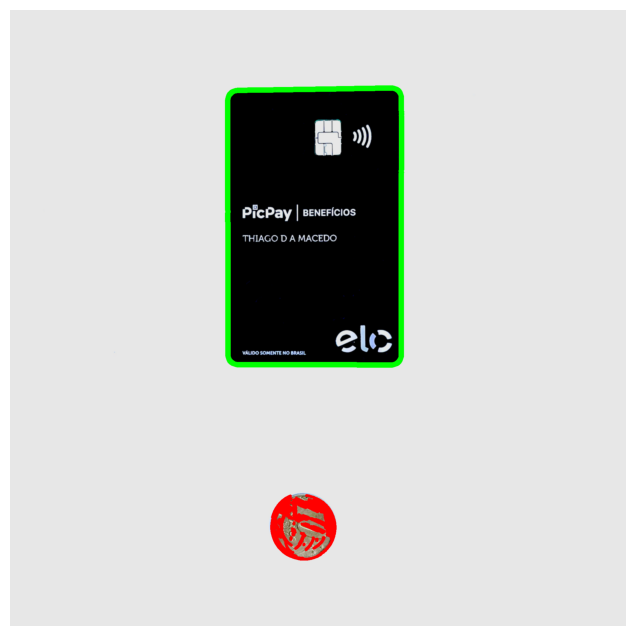

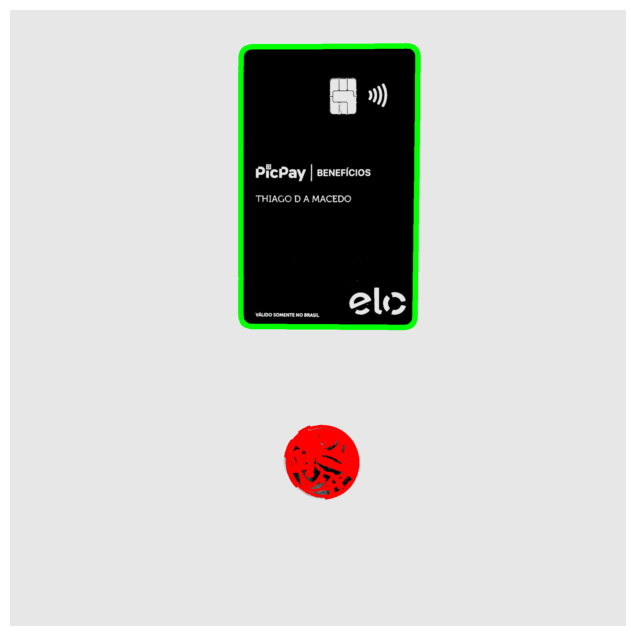

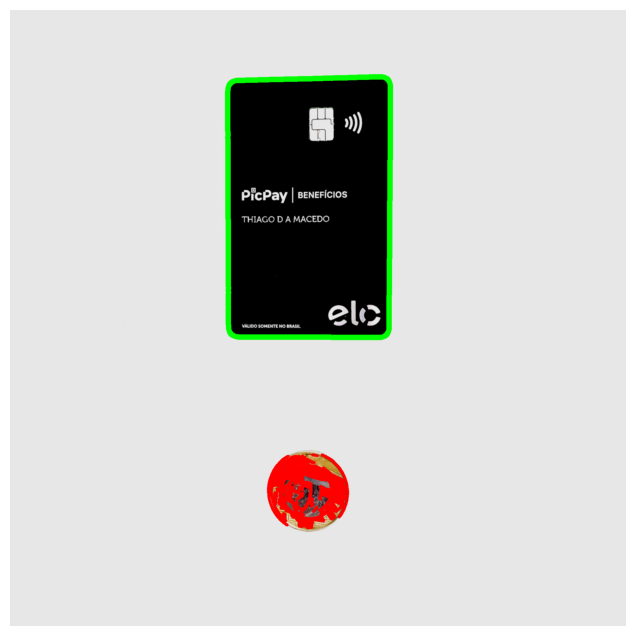

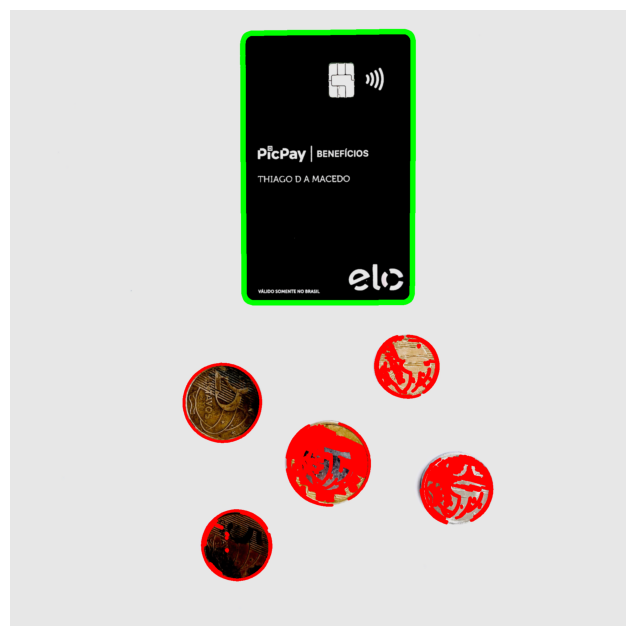

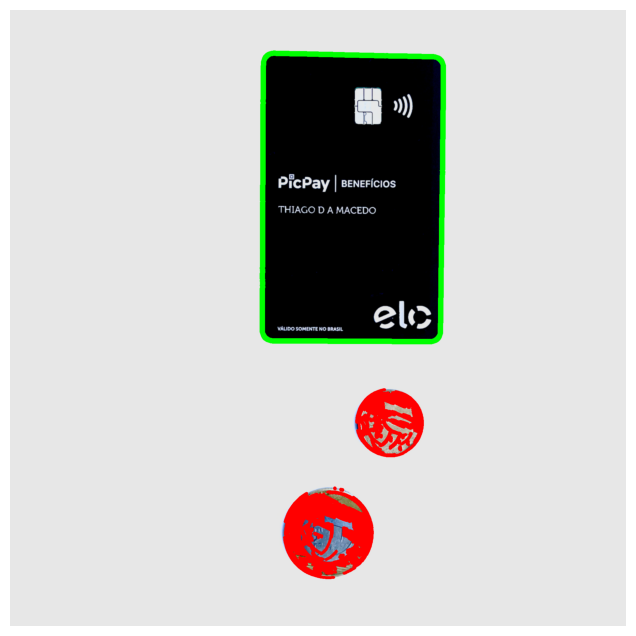

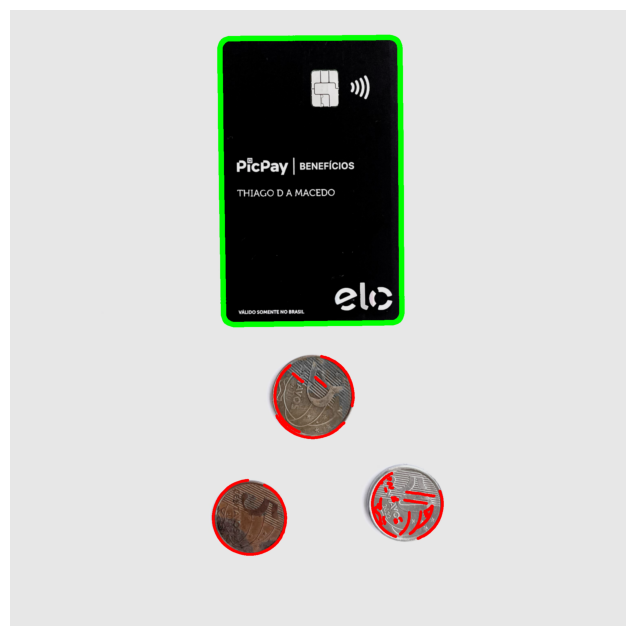

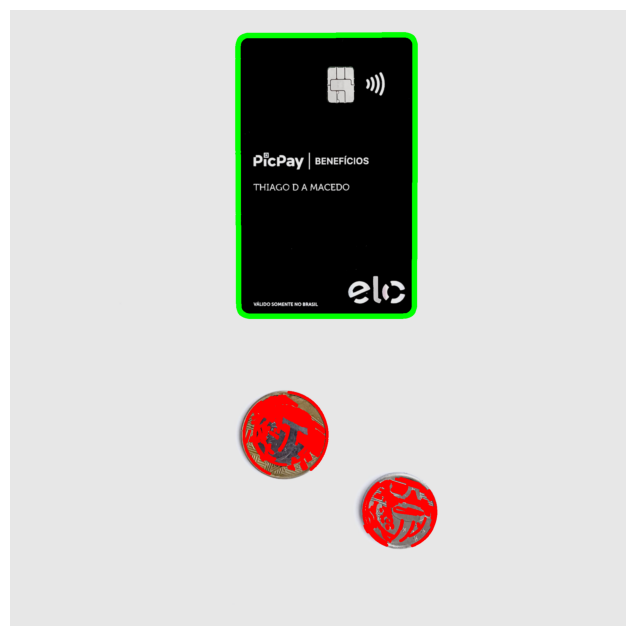

In [15]:
for i in range(10):
    img = cv2.imread(f'imagens_cartao/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 270, 540)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_areas = [cv2.contourArea(x) for x in contours]
    max_contour = max(contours_areas)
    for contour in contours:
        img = cv2.drawContours(img, [contour], -1, (255, 0, 0), 8)
        if cv2.contourArea(contour) == max_contour:
            img = cv2.drawContours(img, [contour], -1, (0, 255, 0), 16)
    #circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=300, param2=60)
    #if circles is not None:
        #circles = np.uint16(np.around(circles))
        #for i in circles[0, :]:
            #img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

None
None
None
None
None
None
None
None
None
None


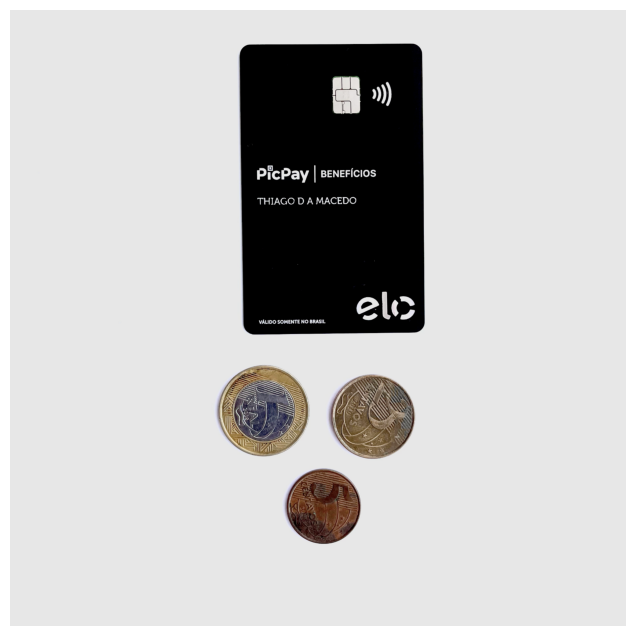

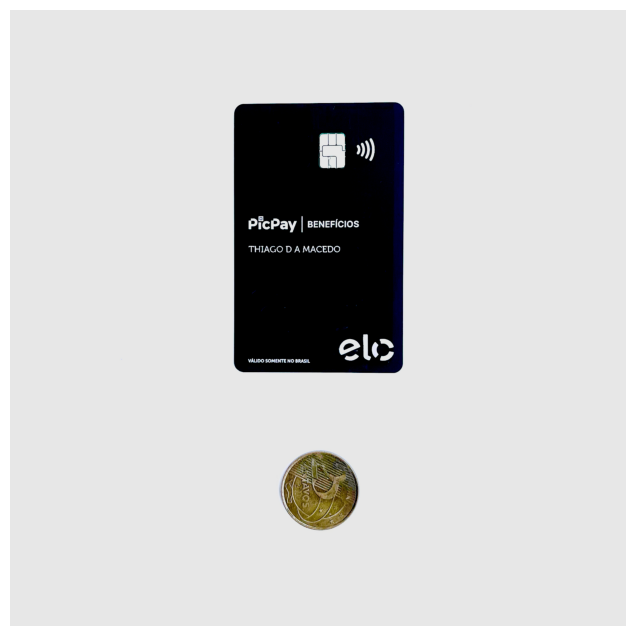

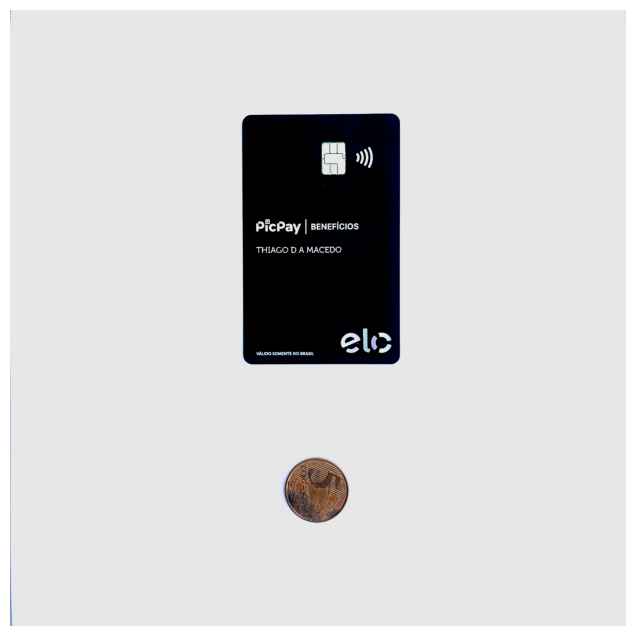

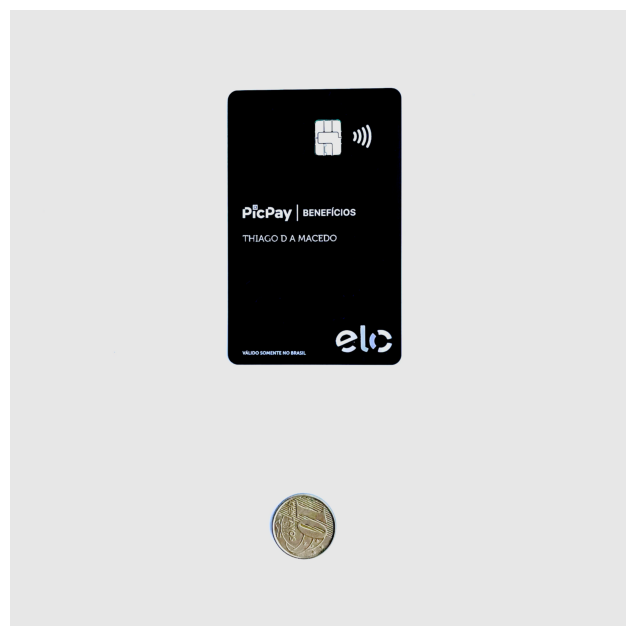

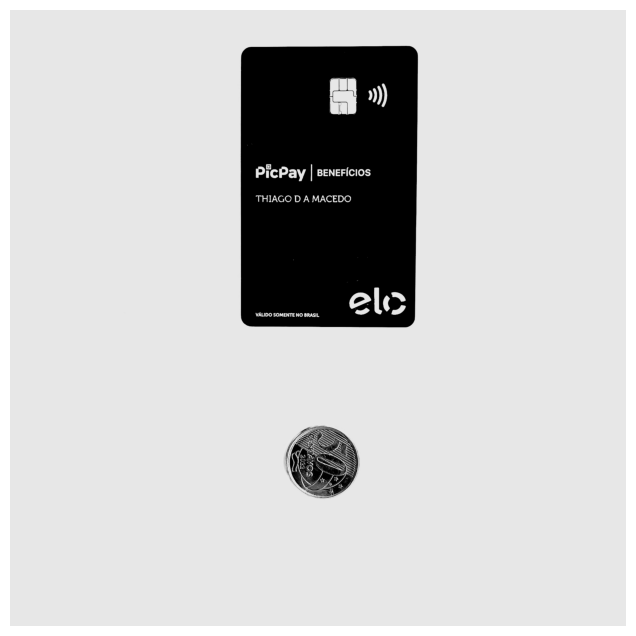

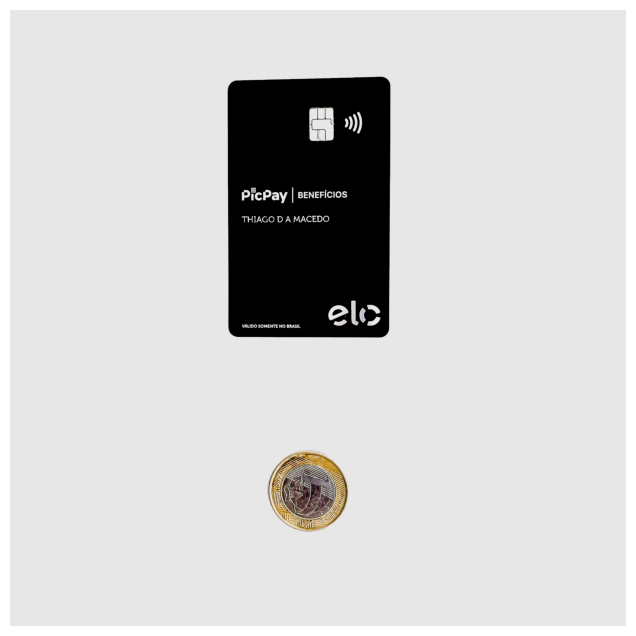

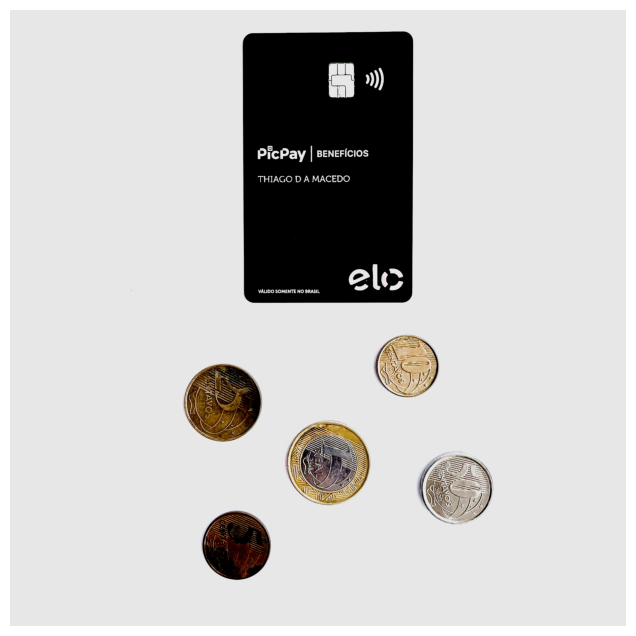

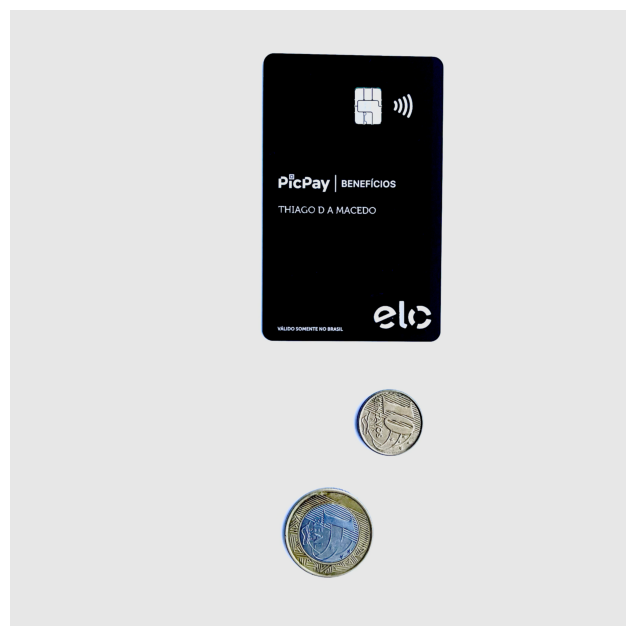

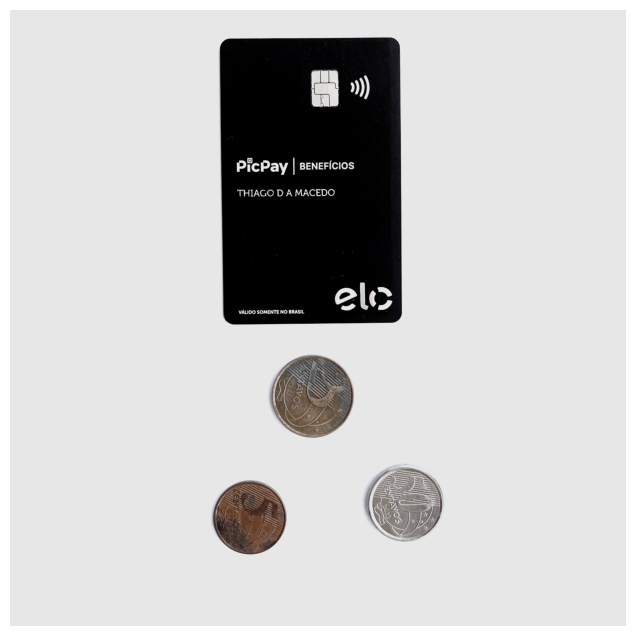

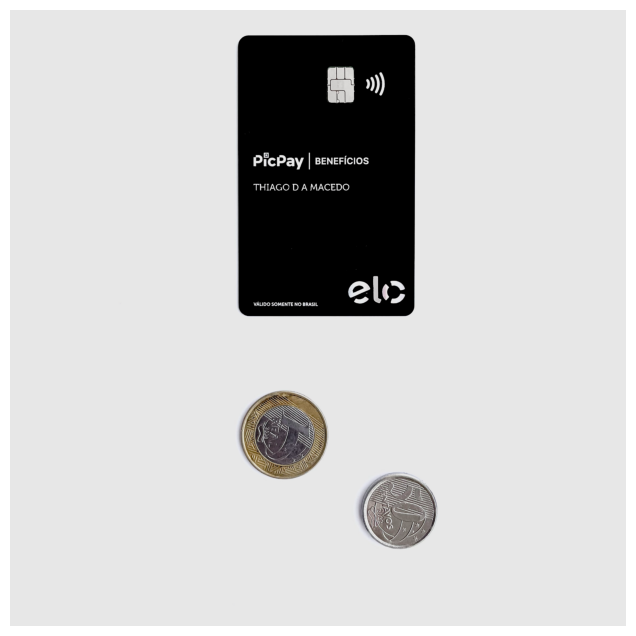

In [8]:
def find_credit_card(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 120, 240)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 10000
    card_contour = None
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)

        if len(approx) == 4:
            area = cv2.contourArea(approx)
            min_area_rect = cv2.minAreaRect(approx)
            width, height = min_area_rect[1]
            aspect_ratio = max(width, height) / min(width, height)

            if area > max_area and 2.5 <= aspect_ratio <= 3.5:
                max_area = area
                card_contour = approx

    return card_contour

for i in range(10):
    img = cv2.imread(f'imagens_cartao/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))

    card_contour = find_credit_card(img)
    print(card_contour)
    if card_contour is not None:
        img = cv2.drawContours(img, [card_contour], -1, (0, 255, 0), 4)

    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()